# Parallelising Neural Network Training with Keras

<img src="./images/keras_tensorflow.jpg" width="350" />

**Note**: This notebook is adapted from chapter 13 in *Python Machine Learning* book, using Keras instead of TensorFlow. This notebook contains also (many) elements of book [*Deep Learning with Python*](https://www.manning.com/books/deep-learning-with-python), chapter 3 and 4. The Keras code is stored [here](https://github.com/fchollet/deep-learning-with-python-notebooks).

## TensorFlow

* TensorFlow is a Python-based, free, **open-source machine learning platform**, developed primarily by **Google**
* Much like NumPy, the primary purpose of TensorFlow is to **enable engineers and researchers** to manipulate **mathematical expressions** over **numerical tensors**

TensorFlow goes **far beyond** the scope of NumPy in the following ways
* It can **automatically compute** the gradient of any differentiable expression, making it highly suitable for machine learning
* It can run not only on **CPU**, but also on **GPUs** and **TPUs**, highly-parallel hardware accelerators
* Computation defined in TensorFlow can be **easily distributed across many machines**
* TensorFlow programs can be **exported to other runtimes**, such as 
    * C++, JavaScript (for browser-based applications), or 
    * TFLite (for applications running on mobile devices or embedded devices), etc. 
* This makes TensorFlow applications **easy to deploy** in practical settings.

## Keras

* Keras is a deep-learning API for Python, built **on top of** TensorFlow
* Provides a **convenient** way to define and train any kind of deep-learning model
* Initially developed for research, with the aim of enabling **fast deep learning experimentation**

<img src="./images/fig_3.1.png" />

[1] *F. Chollet*, Deep Learning with Python, 2nd Ed., chapter 3.1, Fig. 3.1.

Keras and TensorFlow: TensorFlow is a low-level tensor computing platform, Keras is a high-level deep learning API.

**Run Keras**

* **locally** (on CPUs on your own PC; on GPU on your own gaming PC): 
    - It is likely that your laptop doesn't have a graphical processing unit (GPU) suitable for use deep learning computations.
    - This will result in longer training times for your model using only CPUs, but may be the only feasable option if you need to work offline.


* **in the cloud** using [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) or [Kaggle](https://www.kaggle.com/notebooks) 
     - This requires internet connection and a Google / Kaggle account. 
     - You will have access to an outdated GPU 

## Other deep learning libraries

* [PyTorch](https://pytorch.org/) (by Facebook)
* [Caffe](http://caffe.berkeleyvision.org/)
* ... and many more
* [Overview on Wiki](https://en.wikipedia.org/wiki/Comparison_of_deep-learning_software)

## Overview

- [For the unpatient - a quick look at a neural network built with Keras](#For-the-unpatient---a-quick-look-at-a-neural-network-built-with-Keras) - contains <font color=green>**COLAB NOTEBOOK 00**</font>
- [Data representations for neural networks](#Data-representations-for-neural-networks) - contains <font color=green>**COLAB NOTEBOOK 01**</font>
    - [Vector data](#Vector-data)
    - [Time series or sequence data](#Time-series-or-sequence-data)
    - [Image data](#Image-data)
    - [Video data](#Video-data)
- [Introduction to Keras](#Introduction-to-Keras)
    - [Binary classification - Classifying movie reviews](#Binary-classification---Classifying-movie-reviews) - contains <font color=green>**COLAB NOTEBOOK 02**</font>
    - [Multiclass classification - Classifying newswires](#Multiclass-classification---Classifying-newswires) - contains <font color=green>**COLAB NOTEBOOK 03**</font>
    - [Regression - Predicting house prices](#Regression---Predicting-house-prices) - contains <font color=green>**COLAB NOTEBOOK 04**</font>
- [Overfitting and underfitting: regularisation methods for ANN](#Overfitting-and-underfitting:-regularisation-methods-for-ANN) - contains <font color=green>**COLAB NOTEBOOK 05**</font>
- [Choosing activation functions for multilayer networks](#Choosing-activation-functions-for-multilayer-networks)
- [Vanishing gradient problem](#Vanishing-gradient-problem)
- [Loss function: Cross entropy](#Loss-function:-Cross-entropy)
- [Summary](#Summary)

## For the unpatient - a quick look at a neural network built with Keras

* Build our first neural network using the Keras library
* More details on Keras later in this notebook
* <font color=green>**COLAB NOTEBOOK 00**</font>: Data used in this [first example](https://colab.research.google.com/drive/1iG3Gg8-vqVufeCaAgQz9spWFWdp67pDP?usp=sharing): MNIST data (full set) of handwritten digits

## Data representations for neural networks

* Previous example used data stored in multidimensional Numpy arrays, also called **tensors**.
* **All machine learning systems** use tensors as their basic data structure
* Tensors are fundamental to the field of machine learning - TensorFlow was named after them


* What are tensors?
    - tensors are *containers for data* (almost always numerical data)
    - tensors are a *generalisation of matrices* to an *arbitrary* number of dimensions
    - a *dimension* is often called an axis in the context of tensors

### Vector data

* This is the most common case
* In such a dataset, each single data point can be encoded as a vector.
* Thus a batch of data will be encoded as a 2D tensor (array of vectors)
* 2D tensor: first axis is the *samples axis* and the second axis is the *features axis*.

#### Vector data -  Example 1

Actuarial dataset of people considering:
* persons age
* ZIP code
* income

Each person can be characterised as a vector of 3 values. A dataset of 100 000 people could be stored in a 2D tensor of shape `(100000, 3)`.

#### Vector data -  Example 2

A dataset of text documents, where each document is represented by counts of how many times each word appears in it (out of a dictionary of 20 000 common words).

* Each document can be considered as a vector of 20 000 values

If dataset consists of 500 documents, data could be stored in a 2D tensor of shape `(500, 20000)`

### Time series or sequence data

* Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a 3D tensor with an **explicit time axis**
* Each sample can be encoded as a sequence of vectors (a 2D tensor)
* Thus a batch of data will be encoded as a 3D tensor

<img src="./images/fig_2.3.png" width="350"/>

[1] *F. Chollet*, Deep Learning with Python, chapter 2.2.10, Fig. 2.3. **A 3D timeseries data tensor**

#### Timeseries data -  Example

A dataset of stockprices:

* record current price of stock
* record highest price in past minute
* record lowest price in past minute

Given a total of 390 minutes in a trading day, the data of one trading day will be stored in a 2D tensor of shape `(390 x 3)`. If there are 250 days of trading in one year then the data may be stored in a 3D tensor of shape `(250, 390, 3)`. In this case each sample would be the data of one trading day. 

#### Sequence data -  Example

A dataset of tweets:

* encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters
* each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character)

Each tweet can be encoded as a 2D tensor of shape `(280, 128)`. Hence, a dataset of 1 million tweets can be stored in a 3D tensor of shape `(1000000, 280, 128)`.

### Image data

* Images typically have three dimensions: height, width and colour depth
* Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a onedimensional color channel for grayscale images

A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape `(128, 256, 256, 1)`. A
batch of 128 color images could be stored in a tensor of shape `(128, 256, 256, 3)`.

<img src="./images/fig_2.4.png" width="400"/>

[1] *F. Chollet*, Deep Learning with Python, chapter 2.2.11, Fig. 2.4. **A 4D image data tensor (channel-first convention)**

**Two conventions** for shapes of image tensors:
* *channel-last* convention as used by TensorFlow `(samples, height, width, color_depth)`
* *channel-first* convention as used by Theano `(samples, color_depth, height, width)`
* Either, TensorFlow or Theano, may be used as the engine for Keras

### Video data

* Video data is one of the few types of real-world data for which you’ll need 5D tensors
* A video can be understood as a sequence of frames, each frame being a color image
* Because each frame can be stored in a 3D tensor `(height, width, color_depth)`, a sequence of frames can be stored in a 4D tensor `(frames, height, width, color_depth)`
* Thus a batch of **different videos** can be stored in a 5D tensor of shape `(samples, frames, height, width, color_depth)`

#### Video data - Example

Imagine you have a video with the following properties:

* 60 second video
* 144 x 256 (height, width)
* 4 frames per second

A batch of **four** such video clips would be stored in a tensor of shape `(4, 240, 144, 256, 3)`. That’s a total of 106 168 320 values! If the `dtype` of the tensor was `float32`, then each value would be stored in 32 bits, so the tensor would represent 405 MB, which is quite a lot. Videos in real life are much lighter, because they aren’t stored in `float32`, and they’re typically compressed by a large factor (such as in the MPEG format).

<font color=green>**COLAB NOTEBOOK 01**</font>: code on [use of tensors](https://colab.research.google.com/drive/1Ti5xgYJyeMmesZ8vTKCm2L0JeSwNFmsG?usp=sharing)

## Introduction to Keras

This section covers:
* Core components of neural networks
* An introduction to Keras
* Using neural networks to solve basic classification and regression problems


* Three introductory examples of how to use neural networks to address real problems
    - Classifying movie reviews as **positive** or **negative** (binary classification)
    - Classifying news wires by **topic** (multiclass classification)
    - Estimating the **price of a house**, given real-estate data (regression)

### Anatomy of a neural network

 training a neural network revolves around the following objects:

1. **Layers**, which are combined into a network (or model)
2. The **input data** and **corresponding targets**
3. The **loss function**, which defines the feedback signal used for learning
4. The **optimizer**, which determines how learning proceeds

<img src="./images/ANN.png" width="500"/>

[1] *F. Chollet*, Deep Learning with Python, chapter 3.1, Fig. 3.1. **Relationship between the network, layers, loss function and optimiser.**

#### Layers: the building blocks of deep learning

* Layers are a fundamental data structure in neural networks
* A layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors
* The layer’s **weights** contain the network’s **knowledge**

##### Types of layers

Different layers are appropriate for different tensor formats and different types of data
processing. For instance:

* *simple vector data*, stored in 2D tensors of shape `(samples, features)`, is often processed by **densely** connected layers
    - also called **fully** connected or **dense layers**
    - represented by `Dense` class in Keras
* *sequence data*, stored in 3D tensors of shape `(samples, timesteps, features)`, is typically processed by **recurrent layers** such as an `LSTM` layer
* *Image data*, stored in 4D tensors, is usually processed by 2D **convolution layers** (`Conv2D`).

* Layers are the LEGO bricks of deep learning, a metaphor that is made explicit by frameworks like Keras
* Building deep-learning models in Keras is done by clipping together **compatible layers** to form useful **data-transformation** pipelines.
* The notion of **layer compatibility** here refers specifically to the fact that every layer will only accept **input tensors** of a **certain shape** and will return **output tensors** of a certain shape.

**Code implementation**

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')

* Create a layer that accepts only 2D tensors (remember, that's what `Dense` layers do)
* The `Dense` layer has `32` output or activation units
* The first dimension of the 2D tensor is `784` (axis 0, the **batch dimension**, is unspecified, and thus any value would be accepted)
* This layer will return a tensor where the first dimension has been transformed to be `32`

**Code implementation**

* With Keras, there is no reason to worry about compatibility, because the layers added to the models are **dynamically built** to **match the shape** of the **incoming layer**

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32)])

#### Models: networks of layers

* A deep-learning model is a directed, acyclic graph of layers
* The most common instance is a linear stack of layers, mapping a single input to a single output
*  There is a broader variety of network topologies. Some common ones include the following:
    - Two-branch networks
    - Multihead networks
    - Inception blocks

* The **topology** of a network defines a **hypothesis space**
* By choosing a network topology, you **constrain** your space of possibilities (hypothesis space) to a specific **series of tensor operations**, mapping input data to output data
*  Picking the right network architecture is more an **art** than a **science**
*  Although there are some best practices and principles you can rely on, **only practice** can help you become a proper neural-network architect

#### Loss functions and optimizers: keys to configuring the learning process

Once the network architecture is defined, there are two more things that need to be defined.

* **Loss function** (**objective function**): the quantity that will be minimized during training. It represents a measure of success for the task at hand
* **Optimizer**: determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD)

Choosing the right objective function for the right problem is extremely important: the network will take any shortcut it can, to minimize the loss. If the objective doesn’t fully correlate with success for the task at hand, your network will end up
doing things you may not have wanted. 

For common problems such as classification, regression and sequence prediction, there are simple guidelines one can follow to choose the correct loss. For instance:

* **binary crossentropy** for a **two-class classification** problem
* **categorical crossentropy** for a **many-class classification** problem
* **mean squared error** for a **regression** problem
* **connectionist temporal classification (CTC)** for a sequence-learning problem
* etc.

Only when working on truly new research problems one will have to develop own objective functions. In the next few chapters, we’ll detail explicitly which loss functions to choose for a wide range of common tasks. 

### Keras workflow

In the MNIST example we have already built our first Keras model. The general workflow is constructed like this: 

1. Define your training data: input tensors and target tensors.
2. Define a network of layers (or model ) that maps your inputs to your targets.
3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
4. Iterate on your training data by calling the `fit()` method of your model

**Defining a Keras model**

There are two ways to define a Keras model:

1. using the `Sequential` class (only for linear stacks of layers, which is the most common network architecture by far)
2. using the *functional* API (for directed acyclic graphs of layers, which lets you build completely arbitrary architectures)

Here’s a two-layer model defined using the `Sequential` class

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32)])

Once your model architecture is defined, it doesn’t matter whether you used a `Sequential` model or the functional API. All of the following steps are the same. The learning process is configured in the compilation step, where you specify:

* *Loss function (objective function)* — The quantity that will be minimized during training. It represents a measure of success for the task at hand.
* *Optimizer* — Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).
* *Metrics* — The measures of success you want to monitor during training and validation, such as classification accuracy. Unlike the loss, training will not optimize directly for these metrics. As such, metrics don’t need to be differentiable.

Here’s an example with a single loss function, which is by far the most common case:

In [ ]:
# Define model
model = keras.Sequential([keras.layers.Dense(1)])

# Compile model
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

Finally, the learning process consists of passing Numpy arrays of input data (and the corresponding target data) to the model via the `fit()` method, similar to what you would do in Scikit-Learn and several other machine-learning libraries:

In [ ]:
# Fit model (in the same manner as you would with scikit-learn)
model.fit(input_tensor,
          target_tensor, 
          epochs=5
          batch_size=128)

Over the next few chapters, you’ll build a solid intuition about what type of network architectures work for different kinds of problems, how to pick the right learning configuration, and how to tweak a model until it gives the results you want to see. We’ll look at three basic examples in sections: 

* a two-class classification example
* a many-class classification example 
* a regression example

### Binary classification - Classifying movie reviews

Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

<font color=green>**COLAB NOTEBOOK 02**</font>: [Classifying movie reviews](https://colab.research.google.com/drive/1d17CTqADFahrrFvJFFbbvDbxwbVPxuGw?usp=sharing)

### Multiclass classification - Classifying newswires

<font color=green>**COLAB NOTEBOOK 03**</font>: [Classifying newswires](https://colab.research.google.com/drive/103rpmFW5laPRSRttkd5KnrEIx0JrwB-b?usp=sharing)

### Regression - Predciting house prices

<font color=green>**COLAB NOTEBOOK 04**</font>: [Predicting house prices](https://colab.research.google.com/drive/1_hCgKqYjxgBe2mHECK3uAyPhewm9l05k?usp=sharing)

## Overfitting and underfitting: regularisation methods for ANN

<font color=green>**COLAB NOTEBOOK 05**</font>: [Regularisation in Keras](https://colab.research.google.com/drive/17xnyr8TsZu_wF7wQZFnQ-1C9NqxkOXb9?usp=sharing)

## Choosing activation functions for multilayer networks

* Technically, one can use **any function** as an activation function in multilayer neural networks as long as it is **differentiable**
* One could can even use **linear** activation functions, such as in Adaline, but ...


- would **not** be very useful to use linear activation functions for both hidden and output layers 
- to tackle complex problems one needs to introduce **non-linearity**
- the **sum of linear functions** would yield only **another** linear function


### Activation Functions: Pros and Cons

| **Activation Function** | **Pros**                               | **Cons**                                    |
|-------------------------|----------------------------------------|---------------------------------------------|
| **Linear**              | Simple, good for regression            | No non-linearity, cannot handle complex data|
| **Unit Step**           | Simple, useful in binary classification| Not differentiable, poor for gradient-based learning |
| **Sign**                | Easy to compute                        | Non-differentiable, limits model complexity |
| **Piece-wise Linear**    | Used in specific algorithms (SVMs)     | More complex, limited use in neural networks|
| **Logistic (Sigmoid)**  | Smooth output, good for probabilities  | Vanishing gradient problem, slow convergence|
| **Tanh (Hyperbolic Tangent)** | Zero-centered output, stronger gradient | Suffers from vanishing gradients          |
| **ReLU**                | Efficient, fast convergence, avoids vanishing gradients | Can "die" for negative inputs, not zero-centered |


<img src="./images/overview_actfunc.png" width="600"/>

* The **logistic activation function** (which we often called *sigmoid function*) mimics the concept of a neuron in a brain most closely - think of it as the probability of whether a neuron fires or not
* However, logistic activation functions can be problematic
    - When net input $\textbf{z}$ is **highly negative**, $\phi{(\textbf{z})}$ would be close to zero
    - If $\phi{(\textbf{z})}$ is close to zero the neural network would learn **very slowly**
    - More slowly learning could lead to the neural network **getting trapped in local minima** during training

### Logistic function recap

* The **logistic function** is a special case of a **sigmoid function**
* We can use a logistic function to model the probability that sample $\textbf{x}$ belongs to the positive class (class 1) in a **binary classification** task
* The net input $z$ is shown in the following equation:

<img src="./images/netInputZ.png" width="800"/>

The logistic function will compute the following:

<img src="./images/phiOfZ.png" width="400"/>

#### Example using two-dimensional data

In [2]:
# Import necessary modules
import numpy as np

# Generate some two-dimensional data including bias and weight vector w
X = np.array([1, 1.4, 2.5]) ## first value must be 1, since it represents bias
w = np.array([0.4, 0.3, 0.5])

# Define function for computation of net input z
def net_input(X, w):
    return np.dot(X, w)

# Define logistic function
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

# Define phi(z) activation function
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

# Compute probability of x belonging to positive class (y = 1)
print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


However, an output layer consisting of **multiple logistic activation units** does not produce meaningful, interpretable probability values. This is illustrated by code below:

In [3]:
# NOTE: This code was adapted to correspond with equations discussed in chapter 12

# W : array with shape = (n_hidden_units + 1, n_output_units)
#     note that the first row are the bias units
W = np.array([[1.1, 0.2, 0.6],
              [1.2, 0.4, 1.5],
              [0.8, 1. , 1.2],
              [0.4, 0.2, 0.7]])

# A : data array with shape = (n_samples, n_hidden_units + 1)
#     note that the first column of this array must be 1
A = np.array([[1, 0.1, 0.4, 0.6]])

# Compute net input Z and probabilities 
Z = np.dot(A[0], W)
y_probas = logistic(Z)

print('Net Input: \n', Z)

print('Output Units:\n', y_probas)

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.85569687 0.68135373 0.83889105]


* The resulting values **cannot** be interpreted as **probabilities** for a three-class problem
* The reason for this is that they **do not** sum up to 1
* Usually, this is not of concern when we use the model to predict class membership
* One to predict class membership is to assign sample to **maximum value** of $\textbf{Z}$

In [3]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label: {0}'.format(y_class))

Predicted class label: 0


* In certain contexts, it can be useful to compute meaningful class probabilities for multiclass predictions 
* In the next section, we will take a look at a **generalization** of the logistic function, the ``softmax`` function, which can help us with this task

### Estimating class probabilities in multiclass classification via the ``softmax`` function

* In previous sections: obtain a class label using the ``argmax`` function
* The ``softmax`` function is in fact a soft form of the ``argmax`` function; instead of giving a single class index, it provides the **probability of each class**
* The ``softmax`` function allows for computation of **meaningful** class probabilities in **multiclass** settings (multinomial logistic regression)

In ``softmax``, the probability of a particular sample with net input $z$ belonging to the $i$th class can be computed with a normalization term in the denominator, that is, the sum of all $M$ linear functions.
We do not use Softmax in hidden layers: If a hidden layer has multiple neurons, each neuron is supposed to activate independently, meaning they respond to different patterns in the input. However, if we use softmax in a hidden layer, it forces the neurons to compete with each other because their outputs must add up to 1. This would interfere with their job of learning different features from the data and limit the flexibility of the network to learn effectively

<img src="./images/softmax_eq.png" width="500"/>

The ``softmax`` function coded in Python:

In [4]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


In [5]:
np.sum(y_probas)

1.0

In [6]:
np.argmax(y_probas)

0

* The predicted class label is the same as when we applied the ``argmax`` function to the logistic output
* Intuitively, it may help to think of the ``softmax`` function as a *normalized* output that is useful to obtain meaningful **classmembership predictions** in multiclass settings

### Broadening the output spectrum using a hyperbolic tangent

* Another *sigmoid function* that is often used in the **hidden layers** of artificial neural networks is the **hyperbolic tangent** (commonly known as ``tanh``)
* ``tanh`` can be interpreted as a rescaled version of the logistic function

<img src="./images/log_&_tanh.png" width="700"/>


**Advantage of the hyperbolic tangent over the logistic function**

* It has a **broader output spectrum** and ranges in the **open interval** (-1, 1)
* This can improve the convergence of the back propagation algorithm [Neural Networks for Pattern Recognition, C. M. Bishop, Oxford University Press, pages: 500-501, 1995](https://www.microsoft.com/en-us/research/wp-content/uploads/1996/01/neural_networks_pattern_recognition.pdf)
* In contrast, the logistic function returns an output signal that ranges in the open interval (0, 1)

For an intuitive comparison of the logistic function and the hyperbolic tangent, let's plot the two sigmoid functions:

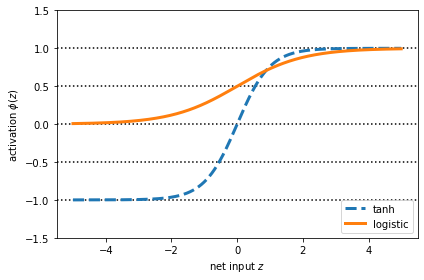

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')

plt.plot(z, tanh_act,
         linewidth=3, linestyle='--',
         label='tanh')

plt.plot(z, log_act,
         linewidth=3,
         label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('images/13_03.png')
plt.show()

* The shapes of the two sigmoidal curves look very similar
* however, the ``tanh`` function has 2× larger output space than the ``logistic`` function

* Note that we implemented the ``logistic`` and ``tanh`` functions verbosely for the purpose of illustration
* In practice, we can use NumPy's ``tanh`` function to achieve the same results:

In [8]:
tanh_act = np.tanh(z)

In addition, the logistic function is available in SciPy's special module:

In [9]:
from scipy.special import expit
log_act = expit(z)

### Rectified linear unit activation

* ``tanh`` and ``logistic`` activations suffer from **vanishing gradient problem**
* This means the **derivative of activations** with respect to net input **diminishes** as $z$ becomes large
* As a result, **learning weights during the training phase** become **very slow** because the gradient terms may be **very close to zero**
* ReLU activation addresses this issue

Mathematically, ReLU is defined as follows:

<img src="./images/relu.png" width="400"/>

* ReLU is still a nonlinear function that is good for learning complex functions with neural networks
* Besides this, the derivative of ReLU, with respect to its input, is always 1 for positive input values
* Therefore, it **solves** the problem of vanishing gradients, making it **suitable for deep neural networks**

## Vanishing gradient problem

* backpropagation worked well with relatively shallow networks (one or two layers of hidden units (1980s)
* but that as the networks got deeper, the networks either 
    - took an inordinate amount of time to train, or 
    - else they entirely failed to converge on a good set of weights

<img src="./images/fig_07_11b.jpg" width=800/>

* Use of backpropagation to update weights **across many** layers 
    * this leads to vanishing gradient problem
    * root of the problem: the gradient of a given layer is the **product** of gradients at **previous** layers

**Chain rule leading to vanishing gradient problem** (1)

* Fundamentally, the backpropagation algorithm is an implementation of the chain rule from calculus
* The chain rule involves the multiplication of terms
* Backpropagating an error from one neuron back to another can involve multiplying the error by a number terms with values less than 1
* These multiplications by values less than 1 happen repeatedly as the error signal gets passed back through the network
* This results in the error signal becoming smaller and smaller as it is backpropagated through the network
* Indeed, the error signal often diminishes exponentially with respect to the distance from the output layer
* The effect of this diminishing error: the weights in the early layers of a deep network are often adjusted by only a tiny (or zero) amount during each training iteration
* In other words: the early layers 
    - either train very, very slowly 
    - or do not move away from their random starting positions at all

**Chain rule leading to vanishing gradient problem** (2)

* However, the early layers in a neural network are vitally important to the success of the network
* It is the neurons in these layers that learn to detect the features in the input
* Later layers of the network use detected features as the fundamental building blocks of the representations 
* These building blocks ultimately determine the output of the network
* The error signal that is backpropagated through the network is in fact the gradient of the error of the network
* --> this problem of the error signal rapidly diminishing to near zero is known as the vanishing gradient problem

Computation of error in hidden layer

<img src="./images/fig_07_11c.png" width=600/>

Compuation of gradients for updating weights of hidden layer

<img src="./images/fig_07_11cc.png" width=500/>

#### The sigmoid activation function and its derivative

<img src="./images/fig_07_11d.jpg" width=600/>

Problem with sigmoid function as activation function

* The derivative becomes very small for large positive $z$ and large negative $z$
* Derivative largest at $0.25$ for $z = 0$ (small value in itself)

#### The hyperbolic tangent activation function and its derivative

<img src="./images/fig_07_11e.jpeg" width=600/>

Problem with hyperbolic tanget function as activation function

* The derivative becomes very small for large positive $z$ and large negative $z$
* At least, derivative around $z = 0$ higher than for sigmoid activation function (maximum 1)
* ==> Vanishing gradient problem still present, but maybe somewhat less severe than with sigmoid
* Consequences
    * same as for sigmoid activation function

* Use of backpropagation to update weights **across many** layers 
    * ==> gradients for first layers may become very small (multiplication of many values < 1 for derivative of sigmoid and hyperbolic tanget activation functions) 
* Consequences
    * long training times
    * ==> weights of first layers change very little to not at all (many epochs needed to update weights)
    * ==> in practice, only weights of last layers will be updated
    * poor performance (poor learning performance of first layer influences learning of following layers)
    * ==> learning of last layers depend on what first layers learn

## Loss function: Cross entropy

* Cross entropy loss, or log loss, measures the **performance of a classification model** whose output represents a **probability**, that is, a value between 0 and 1. 
* Cross entropy loss **increases** as the predicted probability **diverges** from the actual label. So predicting a probability of for example .017 when the actual observation label is 1 would result in a **high** loss value. 
* A perfect model would have a log loss of 0. 



**Choice of cross entropy in Keras**

* Binary classification problems: use binary cross entropy (``binary_crossentropy`` in Keras)
* Multi-class classification problems: use categorical cross entropy (``categorical_crossentropy`` in Keras)

### Binary cross entropy

<img src="./images/binary_logloss.png" width="700"/>

Text(0, 0.5, 'log loss')

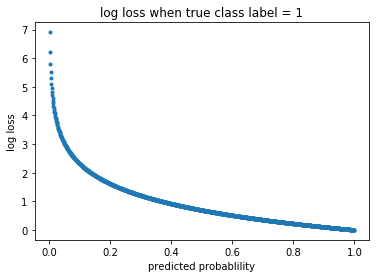

In [10]:
# Import modules
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline


# Define binary cross entropy
def binary_crossEntropy(yHat, y):
    term_1 = y * m.log(yHat)#; print(term_1)
    term_2 = (1 - y) * m.log(1 - yHat)#; print(term_2)
    
    return -(term_1 + term_2)

# Get values between 0 and 1 representing probabilities for which
# we will compute log loss for
values = np.linspace(0.001, .999, 999)

# Compute log losses
logloss = []
for val in values:
    logloss.append(binary_crossEntropy(val, 1))

# Plot log loss, given that true class label is 1
plt.plot(values, logloss, '.')
plt.title("log loss when true class label = 1")
plt.xlabel("predicted probablility")
plt.ylabel("log loss")

### Categorical cross entropy

<img src="./images/categorical_logloss.png" width="600"/>

<img src="./images/cross_entropy.png" width="900"/>

In [6]:
# Import modules
import numpy as np

# Define categorical cross entropy
def categorical_crossEntropy(yHat, y):
    return - np.sum(y * np.log(yHat))

# Define some toy data
y_pred = np.array([0.1, 0.9, 0.1])
y = np.array([0, 1, 0])

# Compute cross entropy
ce = categorical_crossEntropy(y_pred, y)
print(ce)

0.10536051565782628


<img src="./images/categorical_logloss.png" width="600"/>

### Summary of Differences for Cross entropy:
- **Binary Classification**:
  - Two classes (0 or 1).
  - One predicted probability for class 1.
  - Loss is calculated for this single probability.

- **Multiclass Classification**:
  - More than two classes.
  - Multiple predicted probabilities (one for each class).
  - Loss is calculated over all classes, penalizing the model for the true class.

## Summary

Things you have learned in this series of lectures

* Overview over different deep learning tools in using Python
* Basic anatomy/architecture of ANN
* How to build and train models for 
    * binary and multiclass classification
    * regression with few samples using KFold cross validation
* Choose appropriate activation functions for specific problems
* Basic preprocessing of text data
* Regularisation methods for ANN